# Data Analysis Examples

This notebook contains five examples from the text that demonstrate data processing and analysis:

1. USA.gov Data from Bitly
2. MovieLens 1M Data Set
3. US Baby Names 1880 - 2010
4. USDA Food Database
5. Federal Election Commission Database

I have modified the original file to suit our needs for class. You can find the full, original files at http://nbviewer.jupyter.org/github/pydata/pydata-book/blob/2nd-edition/ch14.ipynb, which will more closely match the full content available in the text.

The goal for today is not to understand the code in detail, but preview where we are going in the course. However, hopefully you will find that Python code is very readable, and you will be able to make sense of what is being done in many of the steps.

Each example stands alone, and can be executed on its own, without being dependent on previous (or subsequent) examples. In addition, for any file imports, you must update the file path and name to be consistent with where you have saved the data. Data files are available on the Files page on Canvas, in the Data Files folder.

Here are some important observations to note:

1. Importing modules and configuring settings
2. Previewing, importing, and merging/concatenating data
3. Indexing, selecting, filtering data
4. Efficient use of variable assignment and functions
5. Use of descriptive statistics and data visualization to answer interesting questions about the data
6. Notebook design - Use of comments (#) and Markdown cells

## 1.USA.gov Data from Bitly

In 2011, the URL shortening service Bitly partnered with USA.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. The service is no longer active, but the following example contains processing and analysis of a sample data file.

The following cell contains a series of import statements that load functionality from various libraries, most notably NumPy, matplotlib, and pandas. In addition, there are multiple statements that configure various settings across the imported modules, including the IPython magic statement %matplotlib which enables the notebook to display visualizations inline. Common convention is to list these types of statements at the beginning of your script (i.e., .py file) or notebook.

In [1]:
# Import modules and configure settings
%matplotlib inline
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

The next step when working with data is to preview what it looks like, which will help you plan the next steps for processing that data into a useable form. In order to import a data file, you must first define the local path on your computer where that data file is stored. Then, you can preview the data.

In [3]:
pwd

'/Users/weiyaoma/Desktop/2019.1-5 UMD/BUDT 758X/ALL jpynb'

In [4]:
# Define file path and preview data - Update file path appropriately based on where you stored your data file
path = '/Users/weiyaoma/Desktop/2019.1-5 UMD/BUDT 758X/ALL jpynb/Data Files/bitly/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
# Import json module to load each element from the data file, and explore first record
import json
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Counting Time Zones

The goal in this section is to find the most often-occuring time zones in the data (i.e., the tz field from each record). There are several ways to accomplish this task. Each subsection demonstrates a different approach.

#### Counting Time Zones in Pure Python

In [8]:
# Extract the time zone from each record in the data and store in a list - This is an example of a list comprehension
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [7]:
# Updated process - Only consider records that contain the time zone field
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [9]:
# Report the total number of records with a time zone field
len(time_zones)

3440

In [10]:
# Define function to count the number of records that contain each unique time zone
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [11]:
# Alternative function using a standard Python library
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [12]:
# Apply the function to the list of time_zones and report the number of records with the America/New_York time zone
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [13]:
# Write function to report the most common time zones
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [14]:
# Apply function to counts - Default setting, n = 10
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [15]:
# Apply function to counts - Default setting, n = 5
top_counts(counts, n=5)

[(191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [16]:
# Alternative approach to reporting top time zones, again using standard collections module
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

#### Counting Time Zones with pandas

Before we can use any of the functionality within pandas, we must import the module first. The standard abbreviation for pandas is pd. Once we convert the imported records into a data frame, we can leverage pandas rich functionality to process and analyze the data.

In [17]:
# Import pandas module, convert list of records into a data frame, and preview data
import pandas as pd
frame = pd.DataFrame(records)
frame.head(5)

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [18]:
# Utilize .value_counts method to count occurrence of each time zone, then report most common
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [19]:
# Fill in missing data and update value counts
clean_tz = frame['tz'].fillna('Missing') # One approach that uses .fillna method
clean_tz[clean_tz == ''] = 'Unknown' # Alternative approach that uses boolean array indexing
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

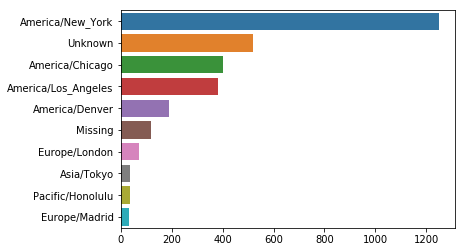

In [20]:
# Import Seaborn data visualization package, and visualize most frequent time zones in a bar plot
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values);

## MovieLens 1M Dataset

GroupLens Research provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data contains records about the users, movie ratings, and movies. Such data is often of interest in the development of recommendation systems that help users find content that they are likely to enjoy. 

The data set itself contains 1 million ratings collected from 6,000 users about 4,000 movies. Each subset of data (i.e., users, ratings, movies) is contained in a separate table.

In [24]:
# Define path to data - Update file path appropriately based on where you stored your data file
path = '/Users/weiyaoma/Desktop/2019.1-5 UMD/BUDT 758X/ALL jpynb/Data Files/movielens/'

In [25]:
# Preview raw data using shell command
fname = 'movies.dat'
!head -n 10 $path$fname

head: /Users/weiyaoma/Desktop/2019.1-5: No such file or directory
head: UMD/BUDT: No such file or directory
head: 758X/ALL: No such file or directory
head: jpynb/Data: No such file or directory
head: Files/movielens/movies.dat: No such file or directory


In [26]:
# Import and load data
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(path + 'users.dat', sep='::', engine='python',
                      header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(path + 'ratings.dat', sep='::', engine='python',
                        header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(path + 'movies.dat', sep='::', engine='python',
                       header=None, names=mnames)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: read_table is deprecated, use read_csv instead.
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: read_table is deprecated, use read_csv instead.
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: read_table is deprecated, use read_csv instead.


In [27]:
# Preview user data
users[:5] # index approach

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [28]:
# Preview ratings data
ratings.loc[:5,:] # alternate index approach

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268


In [29]:
# Preview movie data
movies.head() # .head method, default is 5 rows

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
# Merge data tables and preview first entry
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [31]:
# Create pivot table for mean rating by title of movie and gender of user, view first five titles
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [32]:
# Count number of ratings by title
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [33]:
# Filter to titles with at least 250 ratings
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [34]:
# Report mean ratings for active titles
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [35]:
# Report highly rated movies by male/female users
gender = 'F'
top_ratings = mean_ratings.sort_values(by=gender, ascending=False)
top_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


## US Baby Names 1880–2010

The US Social Security Administration has made available data on the frequency of baby names from 1880 through the present. The following example demonstrates how you can import and concatenate multiple data sets, and develop some interesting lines of questioning with your data.

In [36]:
# Define path to data - Update file path appropriately based on where you stored your data file
path = '/Users/weiyaoma/Desktop/2019.1-5 UMD/BUDT 758X/ALL jpynb/Data Files/names/'

In [37]:
# Preview raw data using shell command
fname = 'yob1880.txt'
!head -n 10 $path$fname

head: /Users/weiyaoma/Desktop/2019.1-5: No such file or directory
head: UMD/BUDT: No such file or directory
head: 758X/ALL: No such file or directory
head: jpynb/Data: No such file or directory
head: Files/names/yob1880.txt: No such file or directory


In [38]:
# Import pandas module and import single data file
import pandas as pd
names1880 = pd.read_csv(path + 'yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [39]:
# Count number of births according to gender - Good example of chaining
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [40]:
# Import and concatenate all data sets from 1880 - 2010
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    temp_path = path + 'yob%d.txt' % year
    frame = pd.read_csv(temp_path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
names.tail(10)

,name,sex,births,year
1690774,Zyeire,M,5,2010
1690775,Zygmunt,M,5,2010
1690776,Zykerion,M,5,2010
1690777,Zylar,M,5,2010
1690778,Zylin,M,5,2010
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


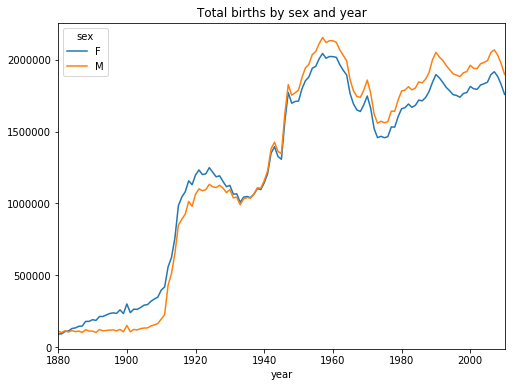

In [41]:
# Aggregate number of birth by year and gender, visualize in a time series plot
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.plot(kind='line', title='Total births by sex and year', figsize=(8,6));

In [42]:
# Define and apply function to calculate proportion of births with a given name for each year and gender
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [43]:
# Define function to get top N names according to the popularity of the name
def get_top(group, n=1000):
    return group.sort_values(by='births', ascending=False)[:n]

In [44]:
# Apply get_top function to create subset of top 1000 names
n = 1000
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top, n=n)
top1000.reset_index(inplace=True, drop=True)
top1000.head(10)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### Analyzing Naming Trends

In [45]:
# Separate male and female name data
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [46]:
# Aggregate number of births by name
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


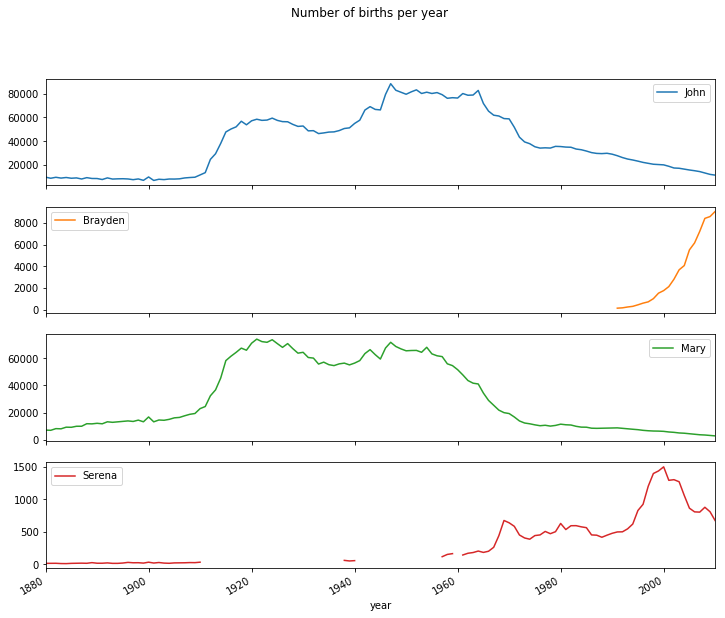

In [47]:
# Visualize time series plots for selected names
name_list = ['John', 'Brayden', 'Mary', 'Serena']
total_births[name_list].plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year");

#### Measuring the increase in naming diversity

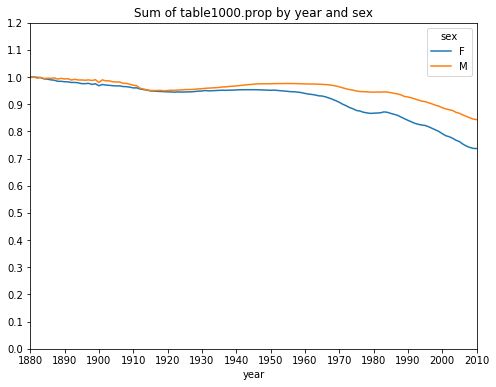

In [48]:
# Calculate the proportion of births attributable to the top 1000 names over time
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10), figsize=(8,6));

In [49]:
# Define function to determine the number of names that account for the top 100q% of births
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

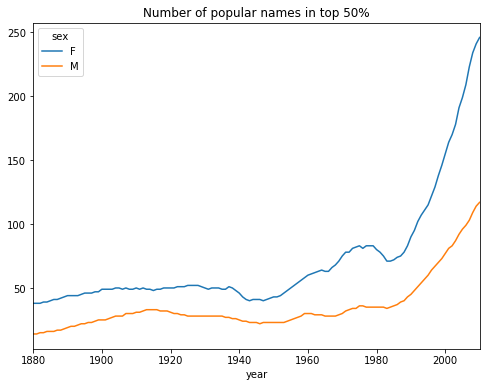

In [50]:
# Apply quantile count function to assess naming diversity
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.plot(title="Number of popular names in top 50%", figsize=(8,6));

#### “Last Letter” Revolution

In [51]:
# Extract last letter from name column and summarize count by gender and year
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [52]:
# Filter to specific years
year_list = [1910, 1960, 2010]
subtable = table.reindex(columns=year_list, level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [53]:
# Calculate proportion of last letters by gender and year
letter_prop = subtable / subtable.sum()
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

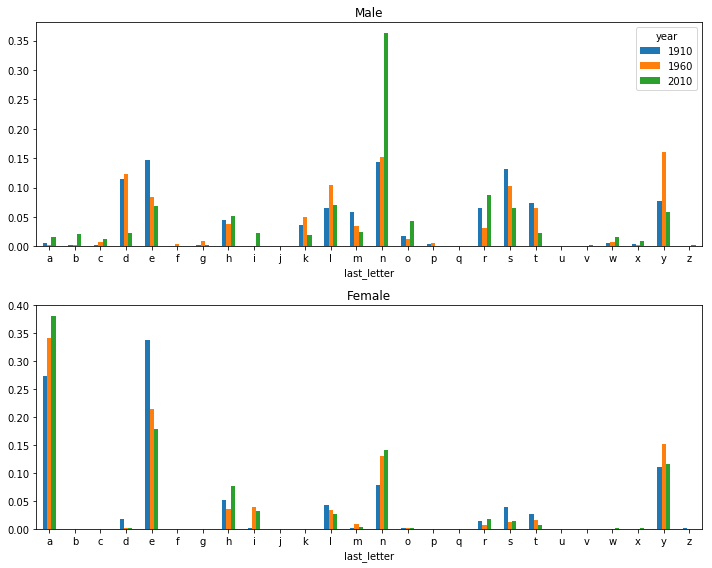

In [54]:
# Import matplotlib and summarize proportion of names by last letter by gender and year
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)
plt.tight_layout()

## USDA Food Database

The US Department of Agriculture makes available a database of food nutrient information. Each food has identifying attributes along with lists of nutrients and portion sizes.

In [57]:
# Define file path and preview data - Update file path appropriately based on where you stored your data file
path = '/Users/weiyaoma/Desktop/2019.1-5 UMD/BUDT 758X/ALL jpynb/Data Files/usda/'

In [58]:
# Import JSON module and load data
import json
db = json.load(open(path + 'database.json'))
len(db)

6636

In [59]:
# Preview data fields
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [60]:
# Preview nutrients entry
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:10]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00
7,"Fiber, total dietary",Composition,g,0.00
8,"Calcium, Ca",Elements,mg,673.00
9,"Iron, Fe",Elements,mg,0.64


In [61]:
# Convert list of entries into data frame
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [62]:
# Summarize counts of most popular food groups
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [63]:
# Compile nutrient information, dropping duplicates
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)
nutrients = nutrients.drop_duplicates()
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [64]:
# Rename duplicate column names
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)

col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [65]:
# Merge food and nutrient data
ndata = pd.merge(info, nutrients, on='id', how='outer')
ndata.iloc[30000]

food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
id                                                6158
manufacturer                                          
nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
Name: 30000, dtype: object

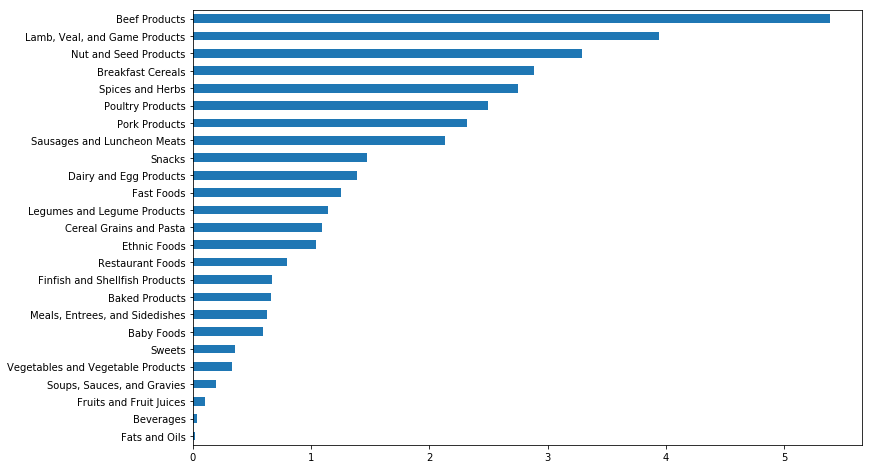

In [66]:
# Visualize median nutrient value by food group
nut = 'Zinc, Zn'
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result[nut].sort_values().plot(kind='barh', figsize=(12,8))
plt.ylabel('');

## 2012 Federal Election Commission Database

The US Federal Election Commission publishes data on contributions to political campaigns. This data includes contributor names, occupation and employer, address, and contribution amount. The following sample was collected for the 2012 US Presidential Election.

In [67]:
# Define path-to-file and import data
path = '/Users/weiyaoma/Desktop/2019.1-5 UMD/BUDT 758X/ALL jpynb/Data Files/fec/'
fec = pd.read_csv(path + 'P00000001-ALL.csv')
fec.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [68]:
# Determine unique candidates
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [69]:
# Define mapping from candidate name to political party and add new column to data frame
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [70]:
# Filter data to positive contributions
fec = fec[fec.contb_receipt_amt > 0]

In [71]:
# Filter data to primary candidates 
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### Donation Statistics by Occupation and Employer

In [72]:
# Top N occupations
n = 10
fec.contbr_occupation.value_counts()[:n]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [73]:
# Clean up occupation names
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

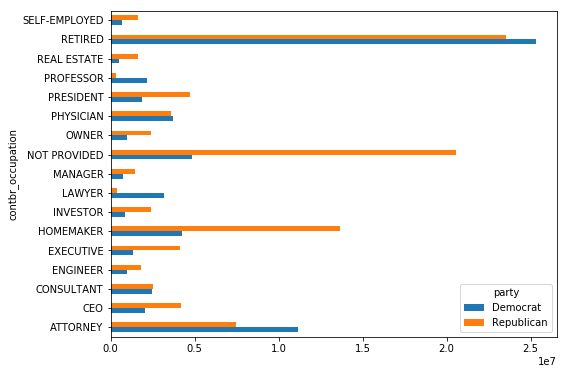

In [74]:
# Aggregate total contributions by occupations that gave at least $2M
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm.plot(kind='barh', figsize=(8,6));

### Bucketing Donation Amounts

In [75]:
# Discretize contribution amounts into (log-scale) buckets
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [76]:
# Total contributions by candidate and contribution bucket
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


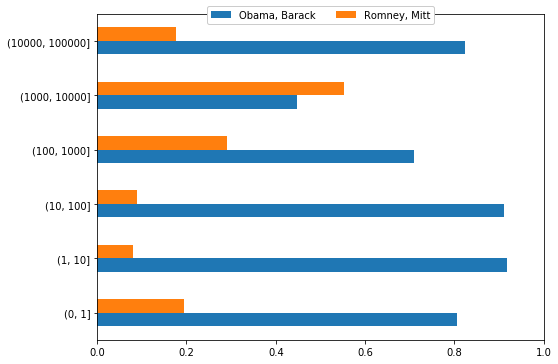

In [77]:
# Normalize contributions for each bucket, and visualize
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums
normed_sums[:-2].plot(kind='barh', figsize=(8,6)).legend(loc='upper center', framealpha=1, ncol=2, bbox_to_anchor=(0.5, 1.0375))
plt.xlim([0,1])
plt.ylabel('');

### Donation Statistics by State

In [78]:
# Group contributions by candidate and state, filtering to states whose residents contributed at least $100K
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals.head()

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60


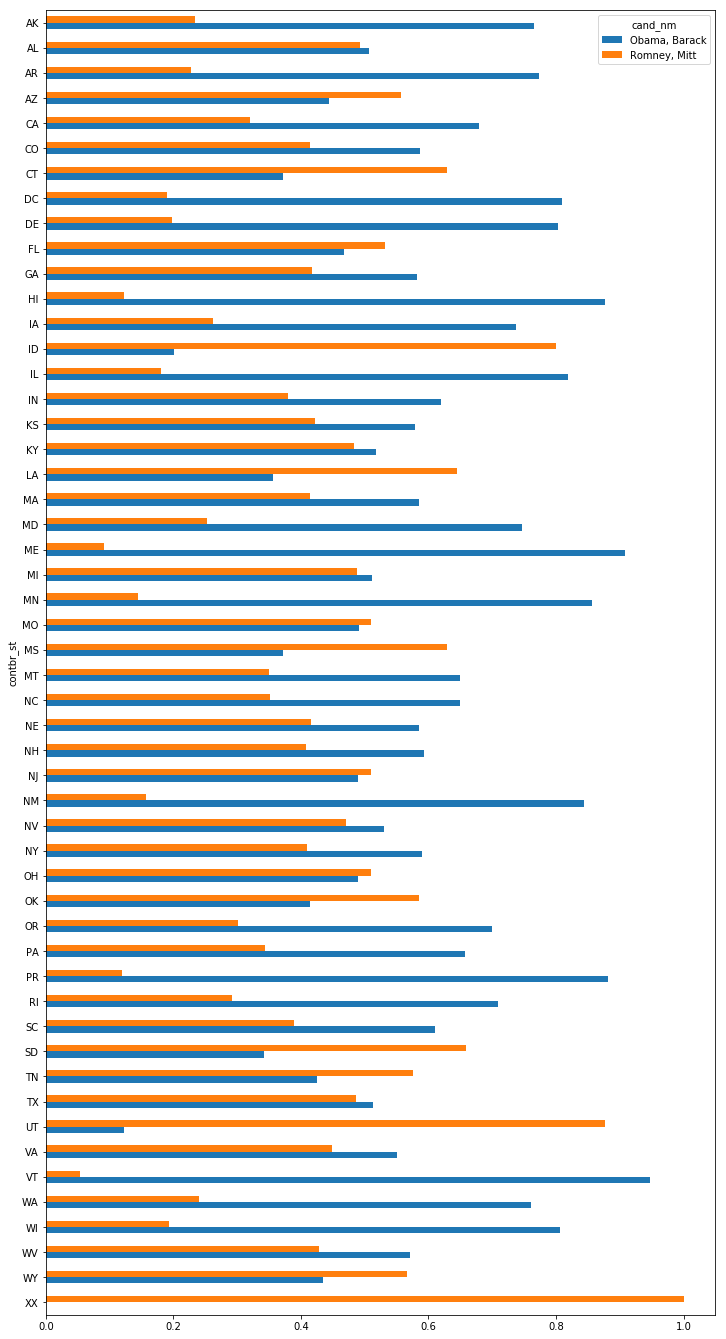

In [79]:
# Normalize and visualize contributions by state
percent = totals.div(totals.sum(1), axis=0)
percent.sort_index(ascending=False).plot(kind='barh', figsize=(12,24));

## Conclusion

These examples give you a preview of where we are going in the course. I highly encourage you to explore these on your own time, and refer back to them for inspiration throughout the course.